<font color="red">
    
**To Do**
* Add firing rate
* Find Interstesting regions to turn into animations
* Create video
* Play in "slow motion"
* in video look for interesting patterns

# Import

In [2]:
%run "Eigendecomposition_Source_Code.ipynb"

Loading: Eigendecomposition_Source_Code.ipynb...
Done at: 2023/09/22 20:09:36


In [3]:
%run "/home/jovyan/work/Human_Hippocampus/Elliott/Latencies/Latencies_Source_Code.ipynb"

In [4]:
import pickle
import re
import os
import glob
from PIL import Image

In [13]:
#file = open('/home/jovyan/work/Human_Hippocampus/StitchedDataUpdated.pkl', 'rb')
file = open('/home/jovyan/work/Human_Hippocampus/StitchedDataUpdated.pkl', 'rb')
sd = pickle.load(file)
file.close()

# Functions

In [103]:
def Lates_get_frames(sd, data, title, resolution, start_t, end_t):
    start_t *= 1000
    end_t *= 1000
    snapshot = datetime.now(Timezone)
    current_time = snapshot.strftime("%Y-%m-%d_%H-%M-%S")
    
    folder_path = f"/home/jovyan/work/Human_Hippocampus/Ari/lates_anim_frames/Animation_{title}_{current_time}"
    os.mkdir(folder_path)
    
    frame_rank = 0
    total_estimated_frames = (end_t - start_t) / resolution 
        
    if total_estimated_frames >= 1000: 
        optin = input("Warning: total estimated frames generated will exceed 10^3, if you wish to continue type 'y': ")
        if optin != "y": 
            raise Exception("Total generated frames exceeds recommended power(10^3)")
    
    while total_estimated_frames > 1:
        total_estimated_frames /= 10
        frame_rank += 1
    
    # get neuron data layout
    neuron_x = []
    neuron_y = []
    for neuron in sd.neuron_data[0].values():
        neuron_x.append(neuron['position'][0])
        neuron_y.append(neuron['position'][1])
        
    frame_num = 0
    
    # set start frame window
    cur_lower = start_t
    cur_upper = start_t + resolution
    
    while cur_lower <= end_t:
        # select arrow range
        pairs_sub = {}   #times_sub = []
        for key,val in data.items():
            to_add = np.where( (val>cur_lower) & (val<cur_upper) )[0] # check this command is correct!
            #times_sub.append(to_add)
            if len(to_add)>0:
                pairs_sub[key] = []
        
        #------------- Draw Plot ----------------------
        
        plt.figure(figsize=(8, 8))
        plt.scatter(neuron_x, neuron_y, alpha=0.15, c='grey')
        
        for pair, entries in pairs_sub.items():
            start_i = pair[0]
            end_i = pair[1]
            arrow = FancyArrow(
                neuron_x[end_i], neuron_y[end_i],
                neuron_x[start_i] - neuron_x[end_i], neuron_y[start_i] - neuron_y[end_i],
                length_includes_head=True, head_width=25,
                linewidth=1, color="red", alpha=0.7, edgecolor="red", facecolor="red")
            plt.gca().add_patch(arrow)
        
        plt.xlabel('um')
        plt.ylabel('um')
        plt.title(f"Directionality plot, Frame: {frame_num}")
        
        frame_str = str(frame_num) 
        print_diff = frame_rank - len(frame_str)
        for i in range(print_diff):
            frame_str = "0" + frame_str
        
        plt.savefig(f"{folder_path}/frame_{frame_str}.png")
        plt.close()
        
        #------------- Draw Plot ----------------------
        
        frame_num += 1
        
        # move frame window up
        cur_lower = cur_upper
        cur_upper += resolution
        
    now = datetime.now(Timezone)
    printNow = now.strftime("%Y/%m/%d %H:%M:%S")
    print(f"Done at: {printNow}")
    
    return folder_path

def Lates_animate(title, path):
    frame_files = sorted([filename for filename in os.listdir(path) if filename.endswith('.png')], key=lambda x: int(re.search(r'\d+', x).group()))
    frames = []
    
    for file in frame_files:
        file_path = os.path.join(path, file)
        image = Image.open(file_path)
        frames.append(image)
    
    
    
    #frames = sorted([Image.open(image) for image in glob.glob(f"{path}/*.png")])
    frame_one = frames[0]
    frame_one.save(f"/home/jovyan/work/Human_Hippocampus/Ari/lates_anim_gif/{title}_lates_anim.gif", format="GIF", append_images=frames[1:],
               save_all=True, duration=150, loop=0)
    
    os.system(f"rm -rf {path}")

os.system(f"rm -rf /home/jovyan/work/Human_Hippocampus/Ari/lates_anim_frames/Animation_First_Ten_Seconds_2023-09-20_22-31-57")

### <font color="red"> SAFETY VERSIONS (UNFINISHED)

In [ ]:
def create_pairs_sub_SAFETY(sd, data, resolution, start_t, end_t):
    return pairs_sub
    
    
def Lates_get_frames_SAFETY(sd, data, title, pairs_sub, resolution, start_t, end_t):
    start_t *= 1000
    end_t *= 1000
    snapshot = datetime.now(Timezone)
    current_time = snapshot.strftime("%Y-%m-%d_%H-%M-%S")
    
    folder_path = f"/home/jovyan/work/Human_Hippocampus/Ari/lates_anim_frames/Animation_{title}_{current_time}"
    os.mkdir(folder_path)
    
    frame_rank = 0
    total_estimated_frames = (end_t - start_t) / resolution 
        
    while total_estimated_frames > 1:
        total_estimated_frames /= 10
        frame_rank += 1
    
    # get neuron data layout
    neuron_x = []
    neuron_y = []
    for neuron in sd.neuron_data[0].values():
        neuron_x.append(neuron['position'][0])
        neuron_y.append(neuron['position'][1])
        
    frame_num = 0
    
    # set start frame window
    cur_lower = start_t
    cur_upper = start_t + resolution
    
    while cur_lower <= end_t:
        # select arrow range
        pairs_sub = {}   #times_sub = []
        for key,val in data.items():
            to_add = np.where( (val>cur_lower) & (val<cur_upper) )[0] # check this command is correct!
            #times_sub.append(to_add)
            if len(to_add)>0:
                pairs_sub[key] = []
        
        #------------- Draw Plot ----------------------
        
        plt.figure(figsize=(8, 8))
        plt.scatter(neuron_x, neuron_y, alpha=0.15, c='grey')
        
        for pair, entries in pairs_sub.items():
            start_i = pair[0]
            end_i = pair[1]
            arrow = FancyArrow(
                neuron_x[end_i], neuron_y[end_i],
                neuron_x[start_i] - neuron_x[end_i], neuron_y[start_i] - neuron_y[end_i],
                length_includes_head=True, head_width=25,
                linewidth=1, color="red", alpha=0.7, edgecolor="red", facecolor="red")
            plt.gca().add_patch(arrow)
        
        plt.xlabel('um')
        plt.ylabel('um')
        plt.title(f"Directionality plot, Frame: {frame_num}")
        
        frame_str = str(frame_num) 
        print_diff = frame_rank - len(frame_str)
        for i in range(print_diff):
            frame_str = "0" + frame_str
        
        plt.savefig(f"{folder_path}/frame_{frame_str}.png")
        plt.close()
        
        #------------- Draw Plot ----------------------
        
        frame_num += 1
        
        # move frame window up
        cur_lower = cur_upper
        cur_upper += resolution
        
    now = datetime.now(Timezone)
    printNow = now.strftime("%Y/%m/%d %H:%M:%S")
    print(f"Done at: {printNow}")
    
    return folder_path

In [41]:
total_length = sd.length / 1000
total_length

385.23805

# Work

## <font color="green"> Animation

In [100]:
anim_title = "small_spike_ZOOM_2265-2375_1ms"

In [101]:
anim_path = Lates_get_frames(sd, lates_dir, anim_title, 1, 226.5, 227.4)

/tmp/ipykernel_24587/3047300483.py:25: DeprecationWarning: Call to deprecated function (or staticmethod) neuron_data. (Use NeuronAttributes instead of neuron_data, with the function load_spike_data())
  for neuron in sd.neuron_data[0].values():
/tmp/ipykernel_24587/3047300483.py:52: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  arrow = FancyArrow(


Done at: 2023/09/29 13:48:58


manual path set if necessary:

In [104]:
Lates_animate(anim_title, anim_path)

## Load Data

In [14]:
#file = open('/home/jovyan/work/Human_Hippocampus/2023_04_02_directed_latency_times.pkl', 'rb')
file = open('/home/jovyan/work/Human_Hippocampus/2023_04_02_latency_times_3.pkl', 'rb')
lates_dir = pickle.load(file)
file.close()

In [5]:
print(lates_dir)

{(0, 1): array([  2414.65,  18342.05,  19076.05,  19724.8 ,  24450.55,  25065.4 ,
        25552.45,  25775.45,  35409.75,  37319.2 ,  42421.5 ,  42461.45,
        46191.15,  46608.7 ,  49075.85,  57111.5 ,  57495.7 ,  61844.95,
        62377.9 ,  62579.25,  65721.5 ,  68098.95,  72178.45,  74264.5 ,
        74997.35,  78883.65,  81431.05,  81863.8 ,  83958.55,  84205.4 ,
        85694.25,  87094.15,  87204.35,  89732.2 ,  90455.75,  91256.9 ,
        92609.95,  97157.1 ,  97890.4 , 100781.55, 101212.35, 103063.45,
       103196.1 , 105005.35, 105328.4 , 107400.25, 108520.9 , 110198.7 ,
       110621.1 , 112094.55, 112254.05, 113303.7 , 117964.55, 118491.1 ,
       122040.35, 122658.4 , 122716.95, 124109.85, 124698.1 , 125142.55,
       125560.75, 126408.65, 126825.45, 128942.25, 129332.  , 129700.35,
       130041.45, 130106.75, 130829.45, 132366.  , 132935.5 , 134125.2 ,
       135172.8 , 137563.25, 138486.4 , 141243.8 , 141534.65, 142580.7 ,
       143319.75, 144648.4 , 147696.15, 14

# Spike Raster

In [15]:
pairs  = []
spikes = []
for key,val in lates_dir.items():
    pairs.append( key )
    spikes.append( val ) 

Get data for making spike raster

In [16]:
idces = []
times = []
for i in range(len(spikes)):
    for spike_time in spikes[i]:
        idces.append(i)
        times.append(spike_time)

In [17]:
times = np.array(times)

In [18]:
len(times)

8178

make plot

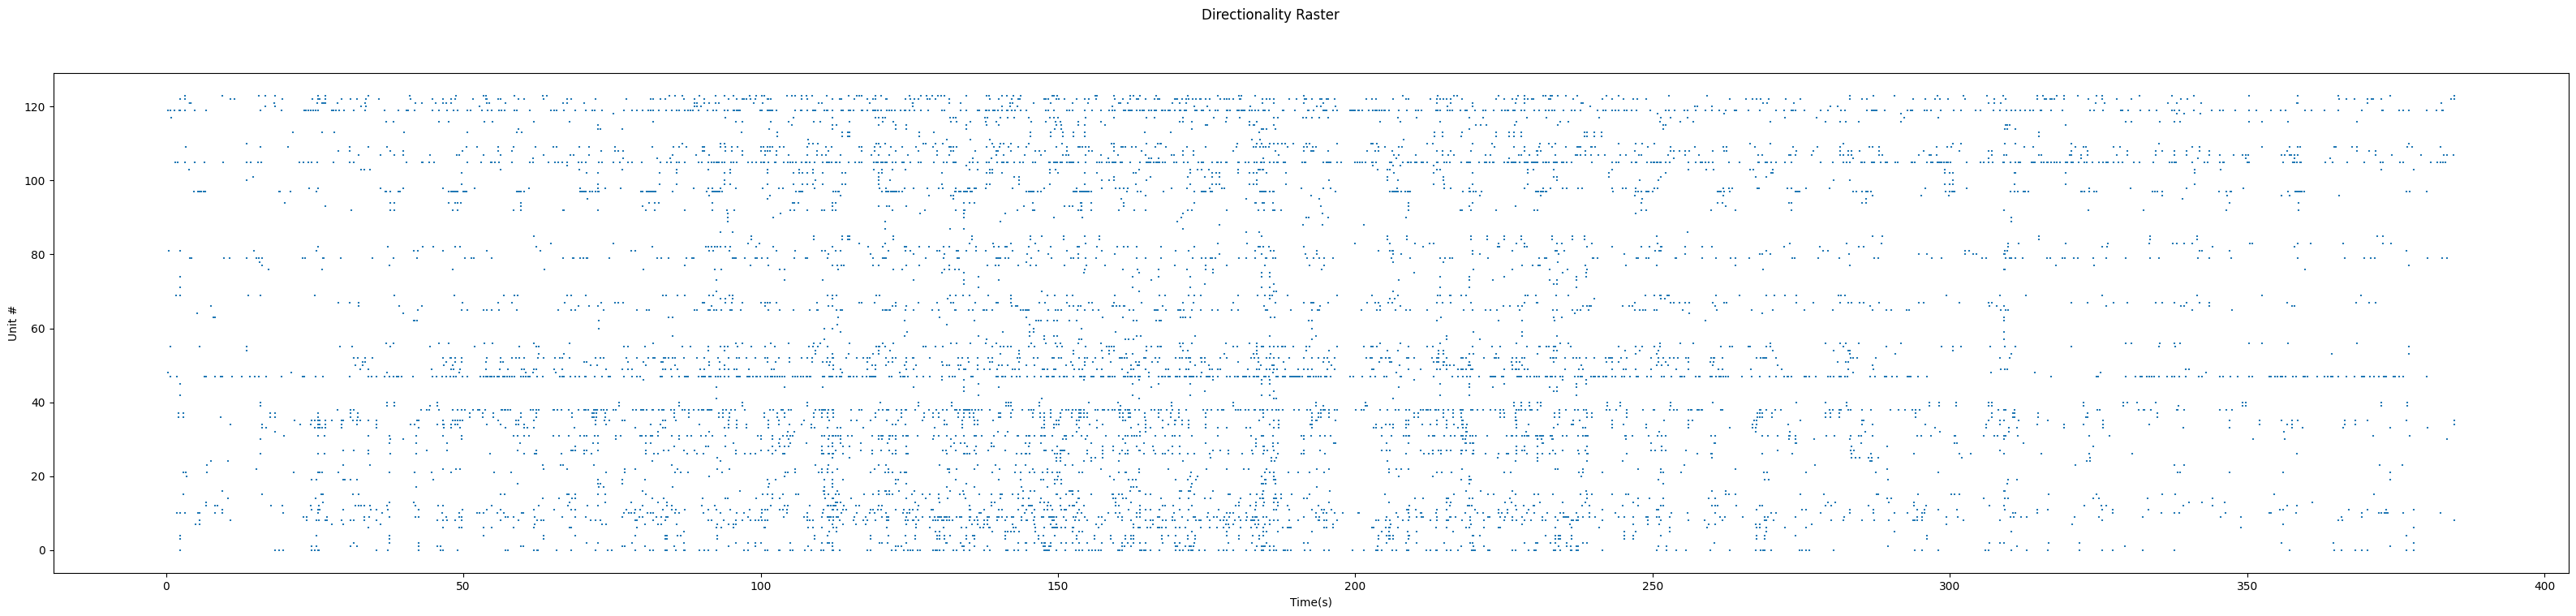

In [19]:
fig, ax = plt.subplots(figsize=( 40, 8))
fig.suptitle("Directionality Raster")
ax.scatter(times/1000,idces,marker='|',s=1)
ax.set_xlabel("Time(s)")
ax.set_ylabel('Unit #')
#plt.xlim(l1, l2)
plt.show()

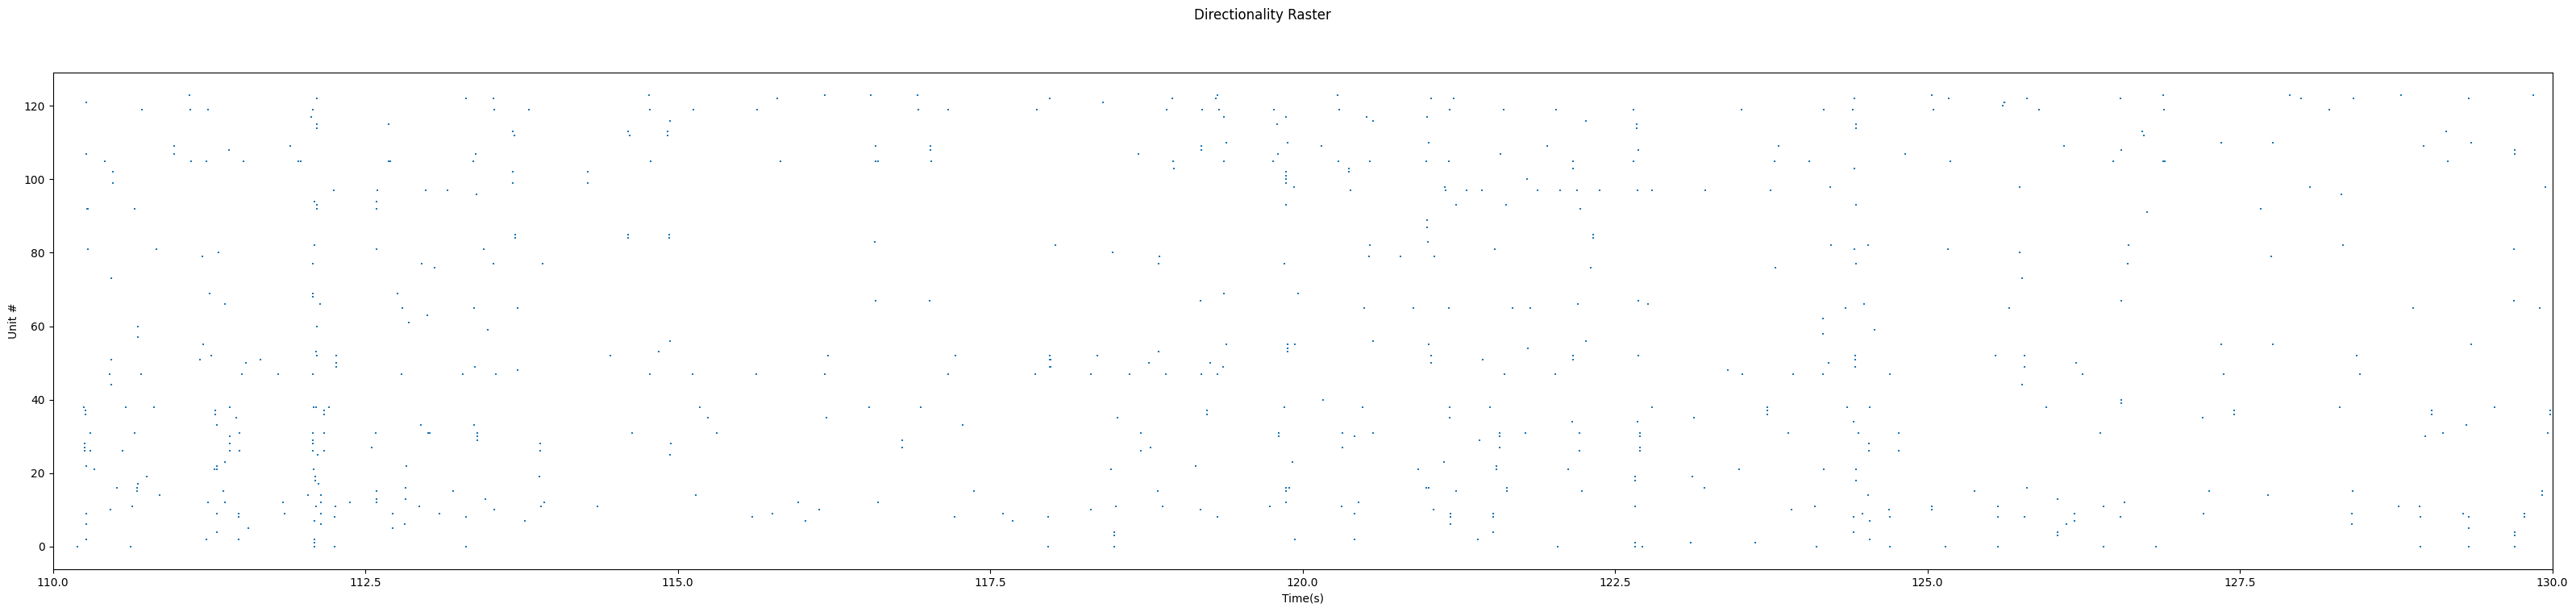

In [30]:
fig, ax = plt.subplots(figsize=( 40, 8))
fig.suptitle("Directionality Raster")
ax.scatter(times/1000,idces,marker='|',s=1)
ax.set_xlabel("Time(s)")
ax.set_ylabel('Unit #')
plt.xlim(110, 130)
plt.show()

# Firing Rate

In [73]:
sd.train

[array([  2414.65,   4601.4 ,   4934.05,   5712.55,   7827.75,  10305.85,
         10867.1 ,  16160.75,  18274.15,  18342.05,  19076.05,  19724.8 ,
         23171.55,  23725.15,  24133.1 ,  24265.35,  24450.55,  24854.45,
         25065.4 ,  25300.85,  25552.45,  25775.45,  25813.75,  26196.85,
         26734.7 ,  26953.35,  27122.5 ,  27909.4 ,  28837.85,  29507.6 ,
         29774.  ,  31045.7 ,  31397.65,  31534.6 ,  32181.3 ,  32655.5 ,
         33346.15,  33408.75,  33984.  ,  34224.85,  34401.2 ,  35218.45,
         35409.75,  36026.85,  36126.6 ,  36859.75,  37319.2 ,  37551.55,
         39020.15,  40904.1 ,  41152.55,  41908.55,  42291.2 ,  42421.5 ,
         42461.45,  42511.1 ,  44985.3 ,  45570.05,  45804.8 ,  46191.15,
         46520.05,  46561.55,  46608.7 ,  47178.4 ,  47245.7 ,  47739.85,
         47979.7 ,  48273.1 ,  48570.  ,  48647.7 ,  49075.85,  49376.85,
         49672.15,  49803.8 ,  51577.85,  53416.25,  53947.7 ,  54781.5 ,
         55868.25,  56230.45,  56624.7

In [74]:
spikes

[array([  2414.65,  18342.05,  19076.05,  19724.8 ,  24450.55,  25065.4 ,
         25552.45,  25775.45,  35409.75,  37319.2 ,  42421.5 ,  42461.45,
         46191.15,  46608.7 ,  49075.85,  57111.5 ,  57495.7 ,  61844.95,
         62377.9 ,  62579.25,  65721.5 ,  68098.95,  72178.45,  74264.5 ,
         74997.35,  78883.65,  81431.05,  81863.8 ,  83958.55,  84205.4 ,
         85694.25,  87094.15,  87204.35,  89732.2 ,  90455.75,  91256.9 ,
         92609.95,  97157.1 ,  97890.4 , 100781.55, 101212.35, 103063.45,
        103196.1 , 105005.35, 105328.4 , 107400.25, 108520.9 , 110198.7 ,
        110621.1 , 112094.55, 112254.05, 113303.7 , 117964.55, 118491.1 ,
        122040.35, 122658.4 , 122716.95, 124109.85, 124698.1 , 125142.55,
        125560.75, 126408.65, 126825.45, 128942.25, 129332.  , 129700.35,
        130041.45, 130106.75, 130829.45, 132366.  , 132935.5 , 134125.2 ,
        135172.8 , 137563.25, 138486.4 , 141243.8 , 141534.65, 142580.7 ,
        143319.75, 144648.4 , 147696.1

code from sparse_raster and binned functions on braingeneerspy

In [83]:
from scipy import sparse

In [85]:
bin_size=1

In [86]:
spikes_length =  max([np.max(sub_spikes) for sub_spikes in spikes])

In [87]:
indices = np.hstack([np.ceil(ts / bin_size) - 1
                     for ts in spikes]).astype(int)
units = np.hstack([0] + [len(ts) for ts in spikes])
indptr = np.cumsum(units)
values = np.ones_like(indices)
length = int(np.ceil(spikes_length / bin_size))
np.clip(indices, 0, length - 1, out=indices)
ret = sparse.csr_array((values, indices, indptr),
                       shape=(len(spikes), length))

code from plot_raster in `Eigendecomposition_Source_Code`

Extermely smoothed bins

In [98]:
pop_rate = ret.sum(0) # in ms
# Lets smooth this to make it neater
sigma = 1000
pop_rate_smooth = gaussian_filter1d(pop_rate.astype(float), sigma=sigma)
t = np.linspace(0, sd.length, pop_rate.shape[0]) / 1000

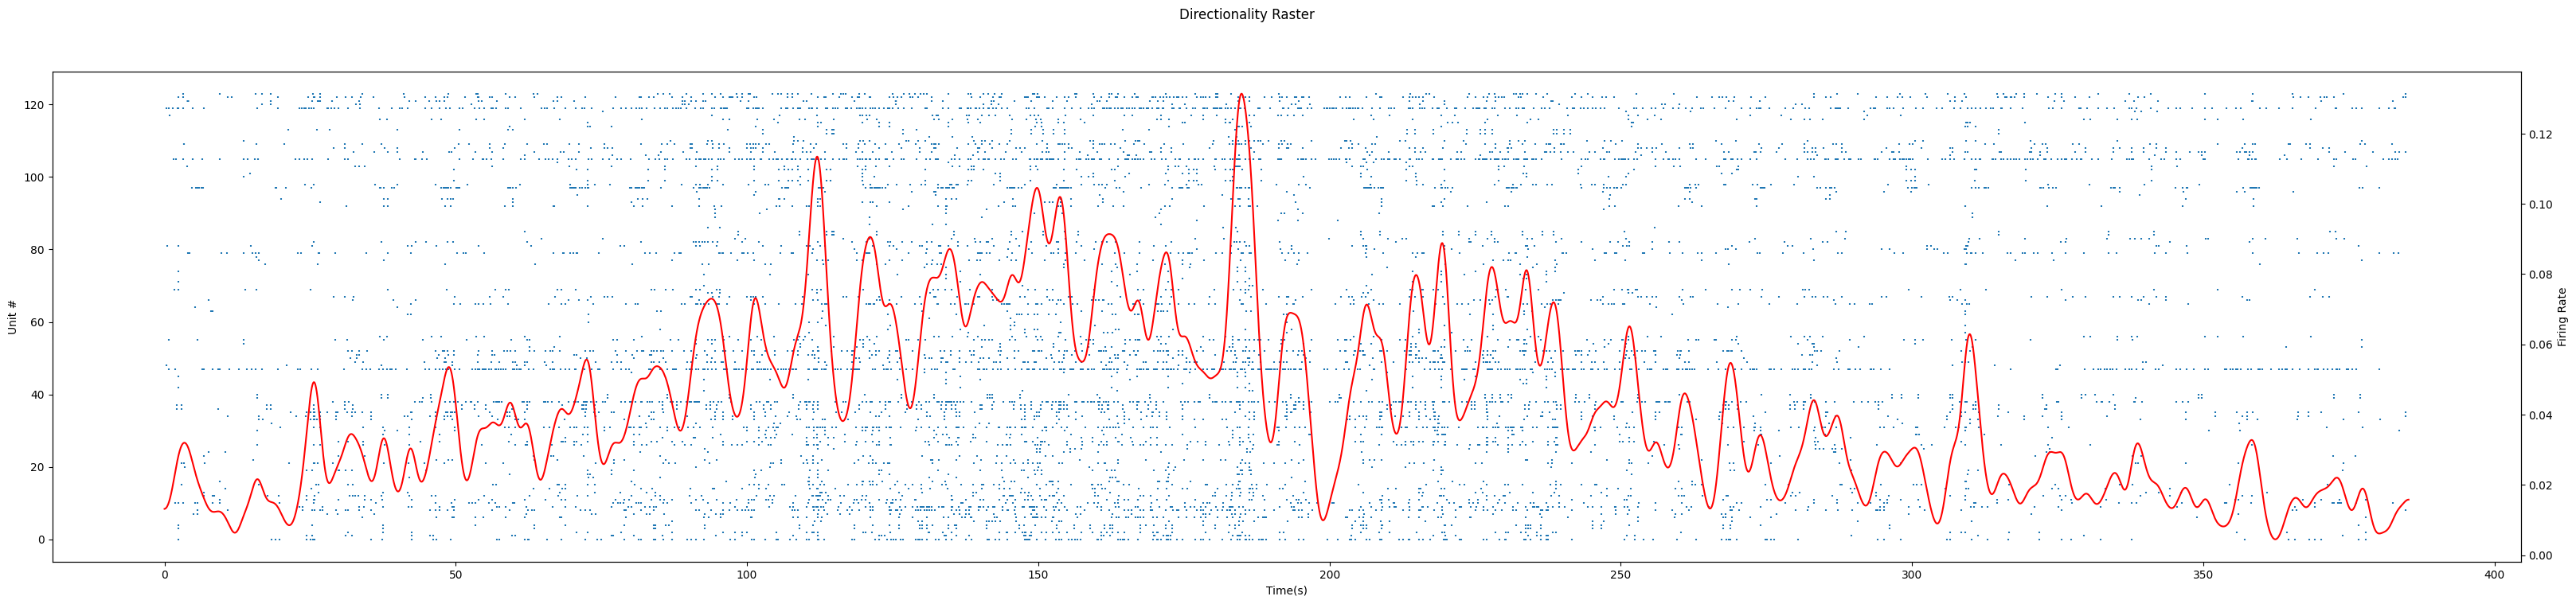

In [99]:
fig, ax = plt.subplots(figsize=( 40, 8))
fig.suptitle("Directionality Raster")
ax.scatter(times/1000,idces,marker='|',s=1)

ax2 = ax.twinx()
ax2.plot(t, pop_rate_smooth, c='r')
ax2.set_ylabel('Firing Rate')

ax.set_xlabel("Time(s)")
ax.set_ylabel('Unit #')
#plt.xlim(180, 190)
plt.show()

In [104]:
pop_rate = ret.sum(0) # in ms
# Lets smooth this to make it neater
sigma = 50
pop_rate_smooth = gaussian_filter1d(pop_rate.astype(float), sigma=sigma)
t = np.linspace(0, sd.length, pop_rate.shape[0]) / 1000

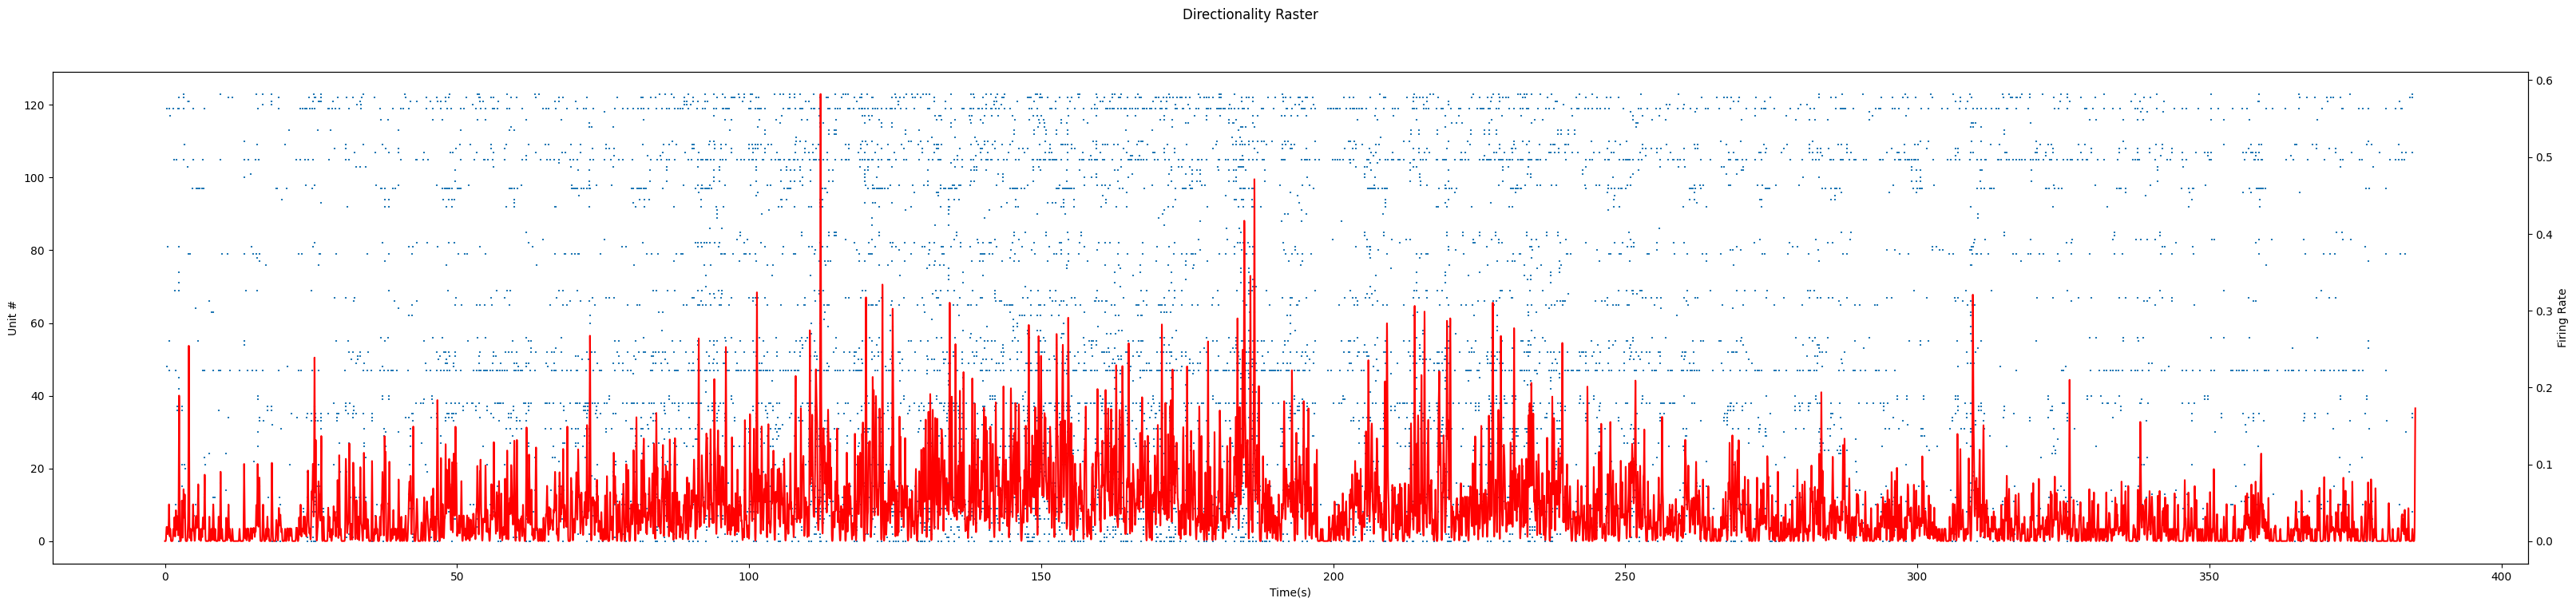

In [105]:
fig, ax = plt.subplots(figsize=( 40, 8))
fig.suptitle("Directionality Raster")
ax.scatter(times/1000,idces,marker='|',s=1)

ax2 = ax.twinx()
ax2.plot(t, pop_rate_smooth, c='r')
ax2.set_ylabel('Firing Rate')

ax.set_xlabel("Time(s)")
ax.set_ylabel('Unit #')
#plt.xlim(180, 190)
plt.show()

# Get pairs

As an example we will get all pairs between 180-182 seconds

In [42]:
pairs_sub = {}   #times_sub = []
start_t = 0
end_t = total_length
"""start_t = 180
end_t = 182"""
for key,val in lates_dir.items():
    to_add = np.where( (val>start_t*1000) & (val<end_t*1000) )[0] # check this command is correct!
    #times_sub.append(to_add)
    if len(to_add)>0:
        pairs_sub[key] = []
    

In [36]:
pairs_sub

{(0, 1): [],
 (0, 39): [],
 (0, 53): [],
 (0, 111): [],
 (0, 127): [],
 (0, 135): [],
 (1, 121): [],
 (2, 36): [],
 (2, 39): [],
 (2, 54): [],
 (6, 53): [],
 (9, 11): [],
 (10, 46): [],
 (11, 35): [],
 (20, 121): [],
 (23, 46): [],
 (23, 71): [],
 (24, 103): [],
 (35, 111): [],
 (41, 103): [],
 (51, 63): [],
 (56, 79): [],
 (60, 83): [],
 (63, 99): [],
 (71, 111): [],
 (71, 127): [],
 (79, 103): [],
 (85, 103): [],
 (98, 103): [],
 (103, 121): [],
 (114, 127): [],
 (121, 137): []}

Plot list

/tmp/ipykernel_24587/3111437334.py:7: DeprecationWarning: Call to deprecated function (or staticmethod) neuron_data. (Use NeuronAttributes instead of neuron_data, with the function load_spike_data())
  for neuron in sd.neuron_data[0].values():
/tmp/ipykernel_24587/3111437334.py:16: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  arrow = FancyArrow(


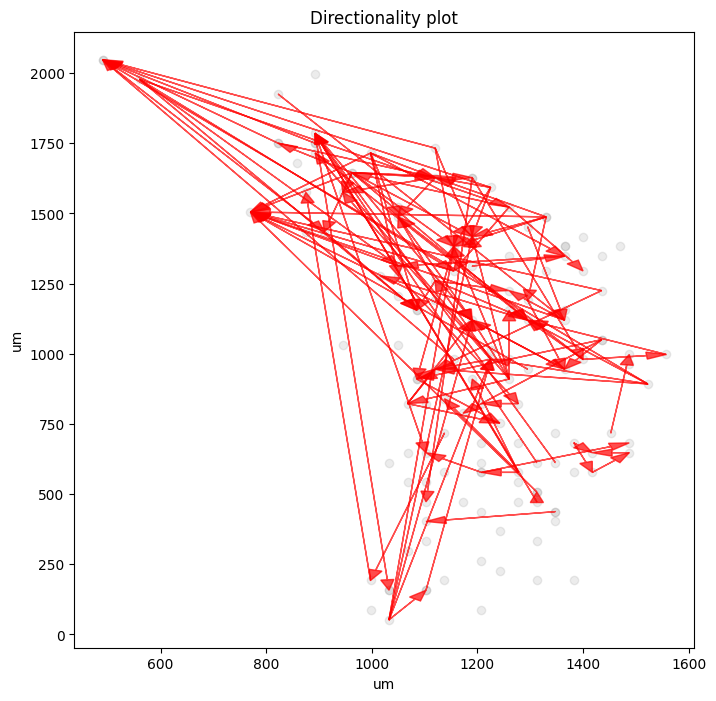

In [43]:
plotLatencyLayout( sd, pairs_sub )

# <font color="brown"> Scratch Paper

In [36]:
#os.mkdir("/home/jovyan/work/Human_Hippocampus/Ari/lates_anim_frames")

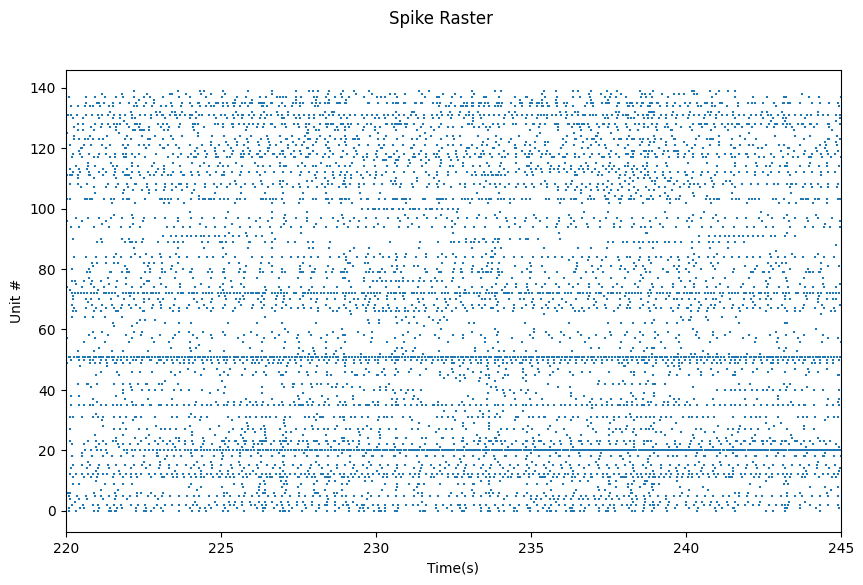

In [92]:
plot_raster(sd, title="Spike Raster", l1=220, l2=245, xsize=10, ysize=6,)

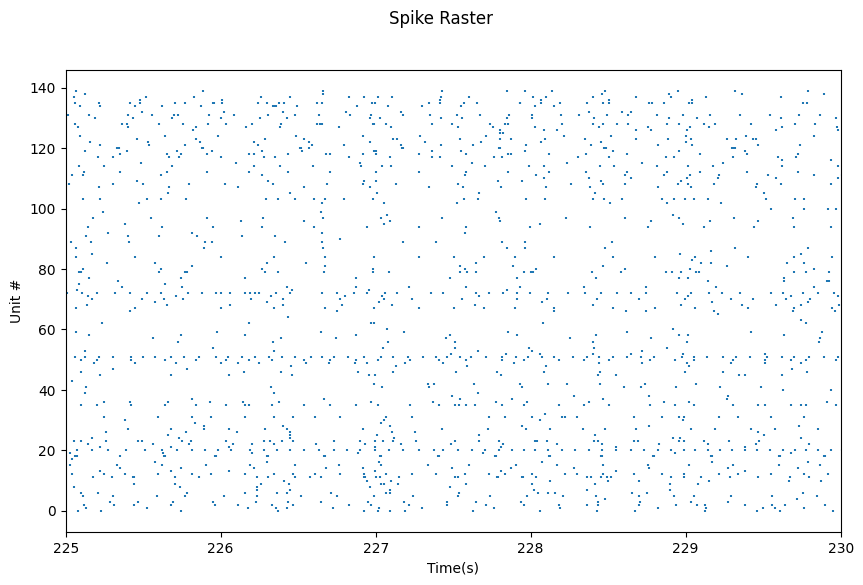

In [98]:
plot_raster(sd, title="Spike Raster", l1=225, l2=230, xsize=10, ysize=6,)

In [9]:
def plot_raster(sd, title="Spike Raster", l1=-10, l2=False, xsize=10, ysize=6, analize=False):
    if l2==False:
        l2 = sd.length / 1000 + 10
    
    idces, times = sd.idces_times()
    
    if analize == True:
        # Get population rate for everything
        pop_rate = sd.binned(bin_size=1)  # in ms
        # Lets smooth this to make it neater
        sigma = 5
        pop_rate_smooth = gaussian_filter1d(pop_rate.astype(float), sigma=sigma)
        t = np.linspace(0, sd.length, pop_rate.shape[0]) / 1000

        # Determine the stop_time if it's not provided
        if l2 is None:
            l2 = t[-1]

        # Filter times and idces within the specified start and stop times
        mask = (times >= l1 * 1000) & (times <= l2 * 1000)
        times = times[mask]
        idces = idces[mask]

    fig, ax = plt.subplots(figsize=(xsize, ysize))
    fig.suptitle(title)
    ax.scatter(times/1000,idces,marker='|',s=1)
    
    if analize == True:
        ax2 = ax.twinx()
        ax2.plot(t, pop_rate_smooth, c='r')
        ax2.set_ylabel('Firing Rate')
        
    ax.set_xlabel("Time(s)")
    ax.set_ylabel('Unit #')
    plt.xlim(l1, l2)
    plt.show()